# Problem 1

## Load and Visualize Data

Text(0,0.5,'Emitted CO2 (tons)')

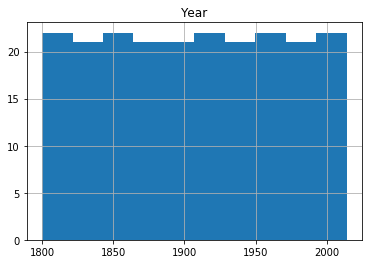

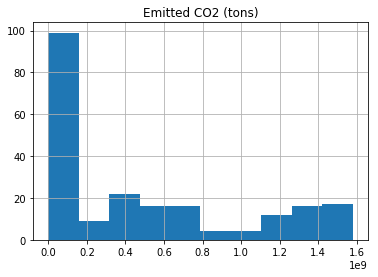

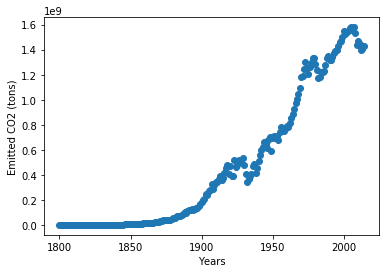

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('US_CO2.csv')
x_years = df['Year']
y = df['Emitted CO2 (tons)']
df.hist(column='Year')
df.hist(column='Emitted CO2 (tons)')
fig, ax = plt.subplots()
ax.scatter(x_years, y)
plt.xlabel('Years')
plt.ylabel('Emitted CO2 (tons)')

## Linear Regression y = a*x + b

rmse 197194968.40790597
rrmse 0.4135870721092022


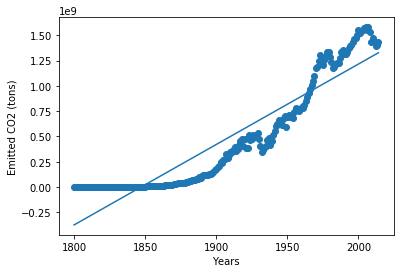

In [3]:
import math
import statistics as st
year_array = np.array(df["Year"])
emission_array = np.array(df['Emitted CO2 (tons)'])
linear_fit = np.polyfit(year_array, emission_array, 1)
ypred = np.polyval(linear_fit, year_array)
rmse = math.sqrt(st.mean((ypred - emission_array)**2))
print('rmse', rmse)
rrmse = rmse/st.mean(emission_array)
print('rrmse', rrmse)
ax.plot(year_array, ypred)
fig


## Polynomial Regression

rmse 77947647.62462814
rrmse 0.1634835798253424


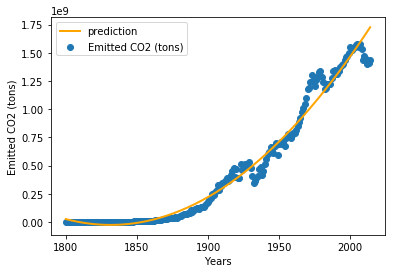

In [5]:
ply_fit = np.polyfit(year_array, emission_array, 2)
ypred = np.polyval(ply_fit, year_array)
rmse = math.sqrt(st.mean((ypred - emission_array)**2))

rrmse = rmse/st.mean(emission_array)

fig, ax = plt.subplots()
ax.scatter(x_years, y)
ax.plot(year_array, ypred, color='orange', linewidth=2, label='prediction')
plt.xlabel('Years')
plt.ylabel('Emitted CO2 (tons)')
plt.legend()
print('rmse', rmse)
print('rrmse', rrmse)

## Feature normalization

rmse 77947647.62462671
rrmse 0.16348357982533937


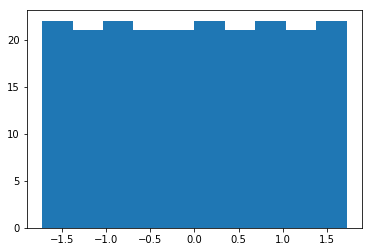

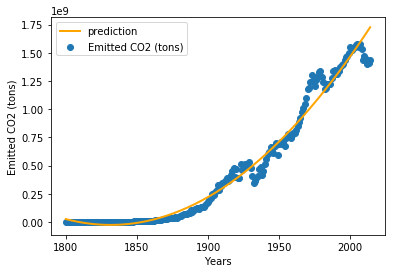

In [7]:
xnorm = year_array - st.mean(year_array)
std = st.stdev(year_array)
xnorm = xnorm/std
xnorm2 = (year_array - min(year_array))/(max(year_array) - min(year_array))
plt.hist(xnorm)
xnorm2

ply_fit = np.polyfit(xnorm2, emission_array, 2)
ypred = np.polyval(ply_fit, xnorm2)
rmse = math.sqrt(st.mean((ypred - emission_array)**2))

rrmse = rmse/st.mean(emission_array)

fig, ax = plt.subplots()
ax.scatter(x_years, y)
ax.plot(year_array, ypred, color='orange', linewidth=2, label='prediction')
plt.xlabel('Years')
plt.ylabel('Emitted CO2 (tons)')
plt.legend()
print('rmse', rmse)
print('rrmse', rrmse)

## Effect of the complexity of the model

/home/garretg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/home/garretg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


Text(0.5,0,'Degree of polynomial')

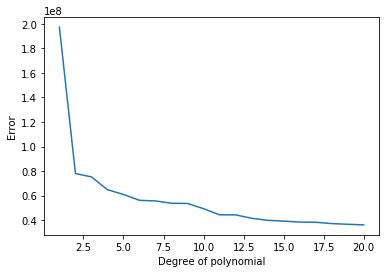

In [8]:
# max degree 20
error = []
for i in range(1, 21):
    p = np.polyfit(xnorm2, emission_array, i);
    ypred = np.polyval(p, xnorm2)
    error.append(math.sqrt(st.mean((ypred - emission_array)**2)))
plt.plot(range(1,21), error)
plt.ylabel('Error')
plt.xlabel('Degree of polynomial')

## Split dataset into training and validation sets

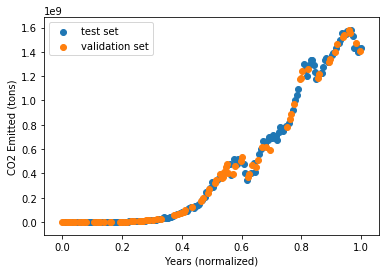

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(xnorm2,df['Emitted CO2 (tons)'],test_size=0.4)
plt.scatter(x_train, y_train, label='test set')
plt.scatter(x_test, y_test, label='validation set')
plt.xlabel('Years (normalized)')
plt.ylabel('CO2 Emitted (tons)')
plt.legend()
None

## Retrain quadratic model with training/validation split

rmse 81107909.75325558
rrmse 0.15828924974938685


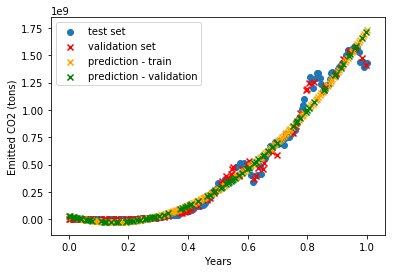

In [11]:
ply_fit = np.polyfit(x_train, y_train, 2)
ypredtrain = np.polyval(ply_fit, x_train)
ypredval = np.polyval(ply_fit, x_test)
rmse = math.sqrt(st.mean((ypredtrain - y_train)**2))

rrmse = rmse/st.mean(y_train)

fig, ax = plt.subplots()
# Plotting training and testing sets
ax.scatter(x_train, y_train, label='test set')
ax.scatter(x_test, y_test, color='red', label='validation set', marker='x')
# Plotting training prediction and validationn prediction
ax.scatter(x_train, ypredtrain, color='orange', label='prediction - train', marker='x')
ax.scatter(x_test, ypredval, color='green', label='prediction - validation', marker='x')

plt.xlabel('Years')
plt.ylabel('Emitted CO2 (tons)')
plt.legend()
print('rmse', rmse)
print('rrmse', rrmse)

## Effect of model complexity on underfitting and overfitting

Text(0.5,0,'Degree of polynomial')

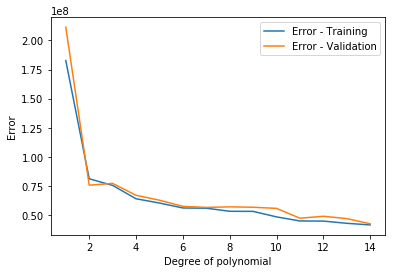

In [12]:
x_train,x_test,y_train,y_test = train_test_split(xnorm2,df['Emitted CO2 (tons)'],test_size=0.5)


error_train = []
error_test = []
x = range(1,15)
for i in x:
    p = np.polyfit(x_train, y_train, i);
    ypredtrain = np.polyval(p, x_train)
    ypredval = np.polyval(p, x_test)
    error_train.append(math.sqrt(st.mean((ypredtrain - y_train)**2)))
    error_test.append(math.sqrt(st.mean((ypredval - y_test)**2)))

plt.plot(x, error_train, label = 'Error - Training')
plt.plot(x, error_test, label = 'Error - Validation')
plt.legend()

plt.ylabel('Error')
plt.xlabel('Degree of polynomial')

## Iteration on different training/test splits

[1.98378602e+08 7.82127401e+07 7.52332271e+07 6.46433999e+07
 6.08746521e+07 5.63252953e+07 5.58368803e+07 5.37380372e+07
 5.32905466e+07 4.90007057e+07]


Text(0.5,0,'Degree of polynomial')

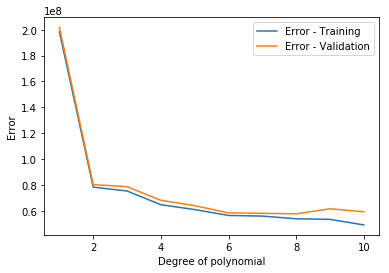

In [13]:
nrepeats = 101
error_train = np.zeros(10)
error_test = np.zeros(10)
x = range(1,11)
for j in range(nrepeats):
    
    x_train,x_test,y_train,y_test = train_test_split(xnorm2,df['Emitted CO2 (tons)'],test_size=0.40)
   
    for i in x:
        p = np.polyfit(x_train, y_train, i);
        ypredtrain = np.polyval(p, x_train)
        ypredval = np.polyval(p, x_test)
        error_train[i - 1] += (math.sqrt(st.mean((ypredtrain - y_train)**2)))
        error_test[i - 1] += (math.sqrt(st.mean((ypredval - y_test)**2)))

error_train = error_train/(nrepeats - 1)
error_test = error_test/(nrepeats - 1)

print(error_train)
plt.plot(x, error_train, label = 'Error - Training')
plt.plot(x, error_test, label = 'Error - Validation')
plt.legend()

plt.ylabel('Error')
plt.xlabel('Degree of polynomial')

Not sure what I am doing wrong here, validation error never seems to deviate

## Predictions

Emitted CO2 prediction for year 2020 is 1.8433574713485237 x 10^9 tons
Emitted CO2 prediction for year 2050 is 2.4854796828009507 x 10^9 tons
Emitted CO2 prediction for year 2100 is 3.7659866548340117 x 10^9 tons


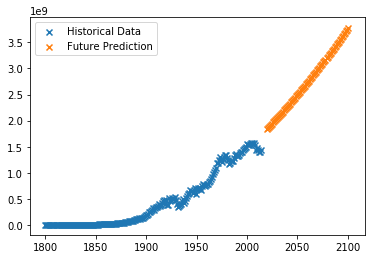

In [14]:
x = df['Year']
y = df['Emitted CO2 (tons)']


p = np.polyfit(xnorm2, y, 2)
x_future = np.array(range(2020, 2101))
x_future_norm = (x_future - min(x))/(max(x) - min(x))
y_future = np.polyval(p, x_future_norm)
plt.scatter(x, y, marker='x',label= 'Historical Data')
plt.scatter(x_future, y_future, marker='x',label='Future Prediction')
plt.legend()
# Normailize the year and show prediction
# Years of interest, 2020, 2050, 2100
future_predictions = {}
for i, year in enumerate(x_future):
    future_predictions[year] = y_future[i]/(10**9)
    
print('Emitted CO2 prediction for year {0} is {1} x 10^9 tons'.format(2020, future_predictions[2020]))
print('Emitted CO2 prediction for year {0} is {1} x 10^9 tons'.format(2050, future_predictions[2050]))
print('Emitted CO2 prediction for year {0} is {1} x 10^9 tons'.format(2100, future_predictions[2100]))

# Problem 2

In [50]:
## Load and visualize data

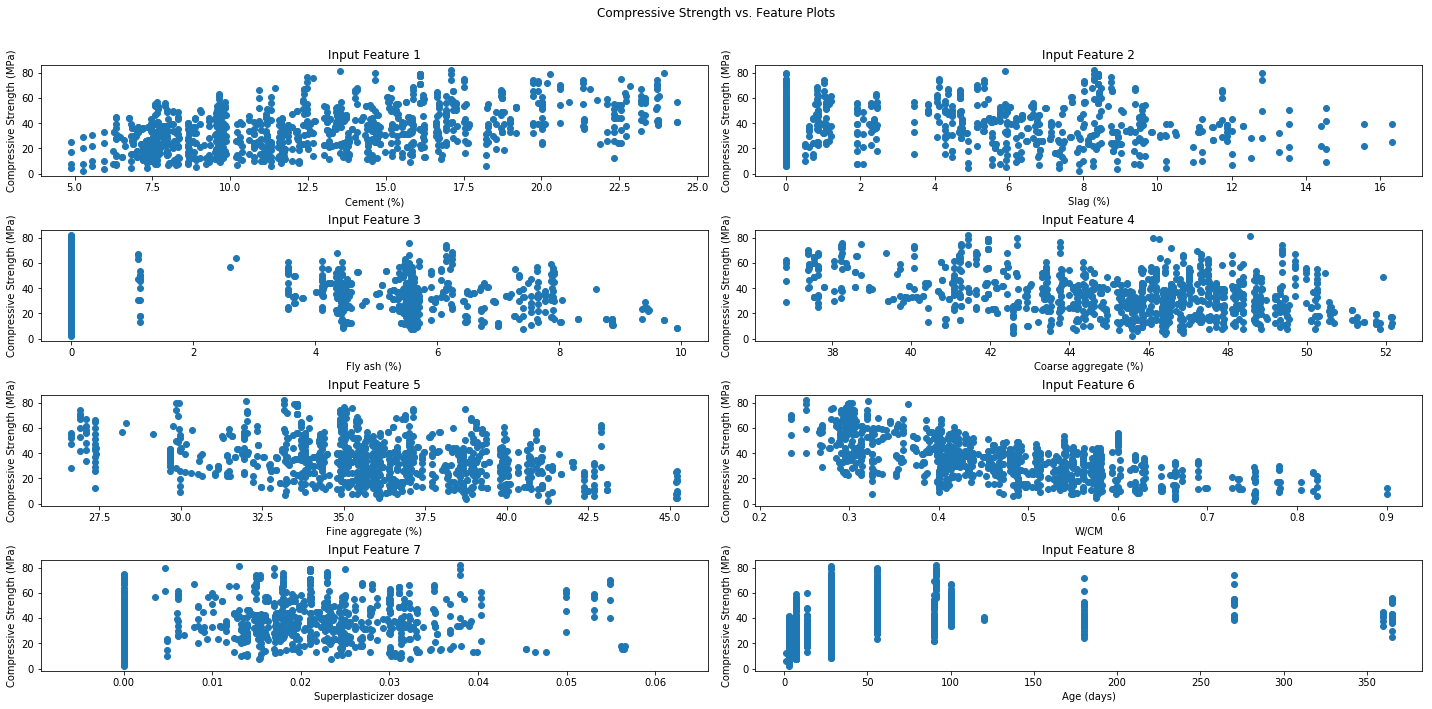

In [59]:
data = pd.read_csv('Concrete_Data.csv')
x1, x2, x3, x4 = data['Cement (%)'],data['Slag (%)'], data['Fly ash (%)'], data['Coarse aggregate (%)']
x5, x6, x7, x8 = data['Fine aggregate (%)'], data['W/CM'],data['Superplasticizer dosage'],data['Age (days)']

input_features = [x1,x2,x3,x4,x5,x6,x7,x8]

y = data['Compressive strength (MPa)']
fig, axs = plt.subplots(4, 2, figsize=(20,10))
fig.suptitle('Compressive Strength vs. Feature Plots')
i = 1
for ax in axs.flat:
    ax.set(ylabel= 'Compressive Strength (MPa)')
    ax.set_title('Input Feature ' + str(i))
    i += 1
    
axs[0,0].scatter(x1, y)
axs[0,0].set(xlabel='Cement (%)')

axs[0,1].scatter(x2, y)
axs[0,1].set(xlabel='Slag (%)')

axs[1,0].scatter(x3, y)
axs[1,0].set(xlabel='Fly ash (%)')

axs[1,1].scatter(x4, y)
axs[1,1].set(xlabel='Coarse aggregate (%)')

axs[2,0].scatter(x5, y)
axs[2,0].set(xlabel='Fine aggregate (%)')

axs[2,1].scatter(x6, y)
axs[2,1].set(xlabel='W/CM')

axs[3,0].scatter(x7, y)
axs[3,0].set(xlabel='Superplasticizer dosage')

axs[3,1].scatter(x8, y)
axs[3,1].set(xlabel='Age (days)')


plt.tight_layout()
plt.subplots_adjust(top=0.9)


## Normalize the features

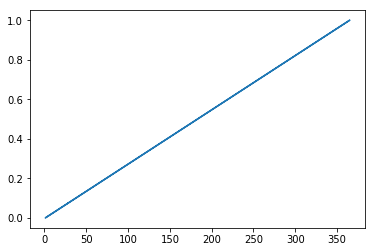

In [71]:
normalized_features = []
for feature in input_features:
    xnew_norm = ((feature - min(feature))/(max(feature) - min(feature)))
    normalized_features.append(xnew_norm)
x1_norm, x2_norm, x3_norm, x4_norm, x5_norm, x6_norm, x7_norm, x8_norm = normalized_features
plt.plot(x8, x8_norm)

## Multivariate linear regression

In [131]:
from sklearn import linear_model
data['ones'] = 1.0
X = data[['ones','Cement (%)','Slag (%)','Fly ash (%)','Coarse aggregate (%)','Fine aggregate (%)','W/CM','Superplasticizer dosage','Age (days)']]
lr = linear_model.Lasso()
lr.fit(X,y)
beta, intercept = lr.coef_, lr.intercept_
beta, intercept
reg = linear_model.LassoCV(cv=10, random_state=0).fit(X, y)
reg.coef_
reg.intercept_


150.22161688636322

In [115]:
beta

array([ 0.        ,  0.65989339,  0.        ,  0.03659413, -2.09048447,
       -1.55131506, -0.        ,  0.        ,  0.0860783 ])